In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
user_profile = pd.read_csv(open('用户基本信息.csv',encoding='utf-8'))
user_profile.head()

,userid,cms_segid,cms_group_id,final_gender_code,age_level,pvalue_level,shopping_level,occupation,new_user_class_level
0,234,0,5,2,5,NaN,3,0,3.0
1,523,5,2,2,2,1.0,3,1,2.0
2,612,0,8,1,2,2.0,3,0,NaN
3,1670,0,4,2,4,NaN,1,0,NaN
4,2545,0,10,1,4,NaN,3,0,NaN


In [4]:
user_profile.shape

(1048575, 9)

# 设置数据抽取的大小

In [51]:
# 使用chunksize对大型csv进行分块处理
chunksize=10000

user_info_chunk = pd.read_csv(open('用户基本信息.csv',encoding='utf-8'),chunksize=chunksize)
user_info = pd.DataFrame()
start_index = 0
for u in user_info_chunk:
    print('正在处理数据第'+str(start_index)+'行数据')
    user_info = user_info.append(u.loc[start_index],ignore_index=True)
    start_index += chunksize
print('数据处理完成')

正在处理数据第0行数据
正在处理数据第10000行数据
正在处理数据第20000行数据
正在处理数据第30000行数据
正在处理数据第40000行数据
正在处理数据第50000行数据
正在处理数据第60000行数据
正在处理数据第70000行数据
正在处理数据第80000行数据
正在处理数据第90000行数据
正在处理数据第100000行数据
正在处理数据第110000行数据
正在处理数据第120000行数据
正在处理数据第130000行数据
正在处理数据第140000行数据
正在处理数据第150000行数据
正在处理数据第160000行数据
正在处理数据第170000行数据
正在处理数据第180000行数据
正在处理数据第190000行数据
正在处理数据第200000行数据
正在处理数据第210000行数据
正在处理数据第220000行数据
正在处理数据第230000行数据
正在处理数据第240000行数据
正在处理数据第250000行数据
正在处理数据第260000行数据
正在处理数据第270000行数据
正在处理数据第280000行数据
正在处理数据第290000行数据
正在处理数据第300000行数据
正在处理数据第310000行数据
正在处理数据第320000行数据
正在处理数据第330000行数据
正在处理数据第340000行数据
正在处理数据第350000行数据
正在处理数据第360000行数据
正在处理数据第370000行数据
正在处理数据第380000行数据
正在处理数据第390000行数据
正在处理数据第400000行数据
正在处理数据第410000行数据
正在处理数据第420000行数据
正在处理数据第430000行数据
正在处理数据第440000行数据
正在处理数据第450000行数据
正在处理数据第460000行数据
正在处理数据第470000行数据
正在处理数据第480000行数据
正在处理数据第490000行数据
正在处理数据第500000行数据
正在处理数据第510000行数据
正在处理数据第520000行数据
正在处理数据第530000行数据
正在处理数据第540000行数据
正在处理数据第550000行数据
正在处理数据第560000行数据
正在处理数据第570000行数据
正在处理数据第580000行数据
正在处理数据第5900

In [52]:
user_info.head()

,age_level,cms_group_id,cms_segid,final_gender_code,new_user_class_level,occupation,pvalue_level,shopping_level,userid
0,5.0,5.0,0.0,2.0,3.0,0.0,NaN,3.0,234.0
1,2.0,8.0,55.0,1.0,1.0,0.0,2.0,2.0,685416.0
2,4.0,4.0,0.0,2.0,1.0,0.0,NaN,3.0,234613.0
3,3.0,3.0,0.0,2.0,NaN,0.0,NaN,1.0,945968.0
4,4.0,4.0,0.0,2.0,NaN,0.0,1.0,3.0,416289.0


# 查看shopping_level一共有多少个等级

In [53]:
user_info['shopping_level'].unique()

array([3., 2., 1.])

# 查看3个购物等级各自的占比情况

In [11]:
user_info.groupby('shopping_level').count()['age_level']

shopping_level
1.0     3
2.0    14
3.0    88
Name: age_level, dtype: int64

In [15]:
# 解决中文显示问题
font ={'family':"SimHei",'size':"15"}
plt.rc("font",**font)

# 饼状图画购物等级占比

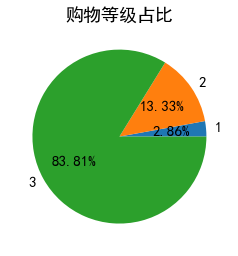

In [14]:
plt.pie(user_info.groupby('shopping_level').count()['age_level'],labels=[1,2,3],autopct='%.2f%%')

plt.title('购物等级占比')
plt.show()

# 柱状图绘制各个购物等级用户的数量

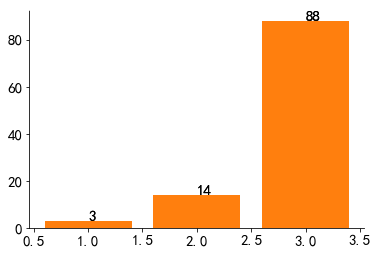

In [21]:
labels=[1,2,3]
y = user_info.groupby('shopping_level').count()['age_level']

plt.bar(labels,height=y)
for a,b in zip(labels,y):
    plt.text(a,b,'%.0f'%b,fontsize=15)

# 去掉边框
ax = plt.gca()
ax.spines['right'].set_color('white')
ax.spines['top'].set_color('white')
plt.show()

# 年龄层次的饼图占比

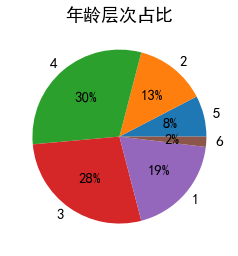

In [24]:
labels = user_info['age_level'].unique()
x = user_info.groupby('age_level').count()['shopping_level']

plt.pie(x,labels=labels.astype(int),autopct='%.0f%%')
plt.title('年龄层次占比')
plt.show()

# 构建年龄和购物等级之间的关系

In [30]:
#1 构建年龄和购物等级之间的关系
#2 首先构建年龄和购物等级之间的关系数组
#3 已知的思路是横轴是年龄，纵轴是购物等级，每一个年龄层次对应购物等级的人数
#4 数据样式
"""
1
2
3
  1  2  3  4  5  6

"""

'\n1\n2\n3\n  1  2  3  4  5  6\n\n'

# 热力图

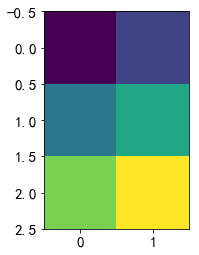

In [33]:
#解决负号的问题
plt.rcParams['axes.unicode_minus']=False
x = [[1,2],[3,4],[5,6]]
plt.imshow(x)
plt.show()

In [54]:
## 先单个计算， 年龄1  消费1 的有多少
age_level_group_data = user_info.groupby('age_level').count()
age_level_group_data

,cms_group_id,cms_segid,final_gender_code,new_user_class_level,occupation,pvalue_level,shopping_level,userid
age_level,,,,,,,,
1.0,8,8,8,2,8,1,8,8
2.0,14,14,14,10,14,8,14,14
3.0,32,32,32,28,32,12,32,32
4.0,29,29,29,19,29,12,29,29
5.0,20,20,20,18,20,10,20,20
6.0,2,2,2,2,2,2,2,2


In [36]:
# 拿到age_level中的每一个值，然后进行shopping_level的计算
age_level_group_data.index.values

array([1., 2., 3., 4., 5., 6.])

In [55]:
for i in age_level_group_data.index.values:
    user_info['age_level'] == i
    print(user_info)

     age_level  cms_group_id  cms_segid  final_gender_code  \
0          5.0           5.0        0.0                2.0   
1          2.0           8.0       55.0                1.0   
2          4.0           4.0        0.0                2.0   
3          3.0           3.0        0.0                2.0   
4          4.0           4.0        0.0                2.0   
5          3.0           9.0       67.0                1.0   
6          2.0           2.0        7.0                2.0   
7          5.0           5.0       42.0                2.0   
8          3.0           9.0       66.0                1.0   
9          3.0           3.0       19.0                2.0   
10         1.0           1.0        0.0                2.0   
11         4.0          10.0        0.0                1.0   
12         1.0           1.0        0.0                2.0   
13         2.0           2.0        0.0                2.0   
14         4.0           4.0        0.0                2.0   
15      

     age_level  cms_group_id  cms_segid  final_gender_code  \
0          5.0           5.0        0.0                2.0   
1          2.0           8.0       55.0                1.0   
2          4.0           4.0        0.0                2.0   
3          3.0           3.0        0.0                2.0   
4          4.0           4.0        0.0                2.0   
5          3.0           9.0       67.0                1.0   
6          2.0           2.0        7.0                2.0   
7          5.0           5.0       42.0                2.0   
8          3.0           9.0       66.0                1.0   
9          3.0           3.0       19.0                2.0   
10         1.0           1.0        0.0                2.0   
11         4.0          10.0        0.0                1.0   
12         1.0           1.0        0.0                2.0   
13         2.0           2.0        0.0                2.0   
14         4.0           4.0        0.0                2.0   
15      

     age_level  cms_group_id  cms_segid  final_gender_code  \
0          5.0           5.0        0.0                2.0   
1          2.0           8.0       55.0                1.0   
2          4.0           4.0        0.0                2.0   
3          3.0           3.0        0.0                2.0   
4          4.0           4.0        0.0                2.0   
5          3.0           9.0       67.0                1.0   
6          2.0           2.0        7.0                2.0   
7          5.0           5.0       42.0                2.0   
8          3.0           9.0       66.0                1.0   
9          3.0           3.0       19.0                2.0   
10         1.0           1.0        0.0                2.0   
11         4.0          10.0        0.0                1.0   
12         1.0           1.0        0.0                2.0   
13         2.0           2.0        0.0                2.0   
14         4.0           4.0        0.0                2.0   
15      

In [59]:
for i in age_level_group_data.index.values:
    print("age_level为{}的shopping_level的情况是".format(i))
    print(user_info[user_info['age_level']==i].groupby('shopping_level').count()['age_level'])

age_level为1.0的shopping_level的情况是
shopping_level
1.0    1
2.0    2
3.0    5
Name: age_level, dtype: int64
age_level为2.0的shopping_level的情况是
shopping_level
2.0     1
3.0    13
Name: age_level, dtype: int64
age_level为3.0的shopping_level的情况是
shopping_level
1.0     2
2.0     1
3.0    29
Name: age_level, dtype: int64
age_level为4.0的shopping_level的情况是
shopping_level
2.0     6
3.0    23
Name: age_level, dtype: int64
age_level为5.0的shopping_level的情况是
shopping_level
2.0     4
3.0    16
Name: age_level, dtype: int64
age_level为6.0的shopping_level的情况是
shopping_level
3.0    2
Name: age_level, dtype: int64


In [60]:
## 创建一个3行6列空数组
x = np.empty((3,0))
x

array([], shape=(3, 0), dtype=float64)

In [61]:
## 按照上边每一列数据生成的逻辑把列表数据赋值
age_level_group_data= user_info.groupby('age_level').count()


for i in age_level_group_data.index.values:
    print("age_level为{}的shopping_level的情况是".format(i))
    result = user_info[user_info['age_level']==i].groupby('shopping_level').count()['age_level']
    print(result)

    
    ## 对这个result进行判断，哪个缺失了就把哪个值给补0
    if len(result) != 3:
        print('长度不是3，判断具体哪个值是缺失的，然后补0')
        
        # 先声明一个含有3个索引的数组，思路是：下边迭代出来的元素依次删除，剩下的就是没有的
        arr = [1,2,3]
        # 遍历索引
        for i in result.index.values.astype(int):
            print("*"*10)
            print(result[i])
            
            # 删除
            print("-"*10)
            print(i)
            arr.remove(i)
        # 遍历arr，然后把result中没有的位置赋值为0
        for a in arr:
            print("开始赋值========" + str(a))
            result[float(a)]=0
            print(result)
        print(arr)
    print("赋值后的result是:")
    
    # 逆序排序，ascending=False
    result = result.sort_index()
    print(result)
    x = np.column_stack((x,result))
print(x)
    

age_level为1.0的shopping_level的情况是
shopping_level
1.0    1
2.0    2
3.0    5
Name: age_level, dtype: int64
赋值后的result是:
shopping_level
1.0    1
2.0    2
3.0    5
Name: age_level, dtype: int64
age_level为2.0的shopping_level的情况是
shopping_level
2.0     1
3.0    13
Name: age_level, dtype: int64
长度不是3，判断具体哪个值是缺失的，然后补0
**********
1
----------
2
**********
13
----------
3
开始赋值========1
shopping_level
2.0     1
3.0    13
1.0     0
Name: age_level, dtype: int64
[1]
赋值后的result是:
shopping_level
1.0     0
2.0     1
3.0    13
Name: age_level, dtype: int64
age_level为3.0的shopping_level的情况是
shopping_level
1.0     2
2.0     1
3.0    29
Name: age_level, dtype: int64
赋值后的result是:
shopping_level
1.0     2
2.0     1
3.0    29
Name: age_level, dtype: int64
age_level为4.0的shopping_level的情况是
shopping_level
2.0     6
3.0    23
Name: age_level, dtype: int64
长度不是3，判断具体哪个值是缺失的，然后补0
**********
6
----------
2
**********
23
----------
3
开始赋值========1
shopping_level
2.0     6
3.0    23
1.0     0
Name: age_level, dtype: in

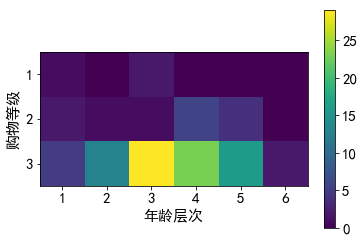

In [62]:
plt.imshow(x)
## cmap 
plt.xlabel('年龄层次')
plt.ylabel('购物等级')

# 修改x轴和y轴的刻度
plt.xticks(np.arange(6),np.arange(1,user_info['age_level'].unique().astype(int).max()+1))
plt.yticks(np.arange(3),np.arange(1,user_info['shopping_level'].unique().astype(int).max()+1))
plt.colorbar()
plt.show()